In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy as np
import pandas as pd

# 데이터 준비
data = pd.read_csv("/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv")

print(data.head(3))
print(data.tail(3))

   Year  Month Region_Name  Building_Age Building_Use  JS_Price  JS_BA  \
0  2011      1         관악구             6         오피스텔     12000  25.05   
1  2011      2         관악구             6         오피스텔     10000  25.05   
2  2011      2         관악구             6         오피스텔     10500  26.18   

   Population    IR   UR  LC_index  CA_index  TC_index  SDT_index  HSP_index  \
0      521193  2.75  3.8      72.0      78.2      74.2        NaN       81.2   
1      521193  2.75  4.5      72.3      78.2      74.5        NaN       82.0   
2      521193  2.75  4.5      72.3      78.2      74.5        NaN       82.0   

   Sell_Price  Crime_Rates       위도         경도  
0     15800.0          NaN  37.4745  126.98139  
1     16875.0          NaN  37.4745  126.98139  
2     16875.0          NaN  37.4745  126.98139  
        Year  Month Region_Name  Building_Age Building_Use  JS_Price  JS_BA  \
836080  2019     11         송파구            12          아파트     76000  59.88   
836081  2019     11         

## 시각화(QQ 플롯)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

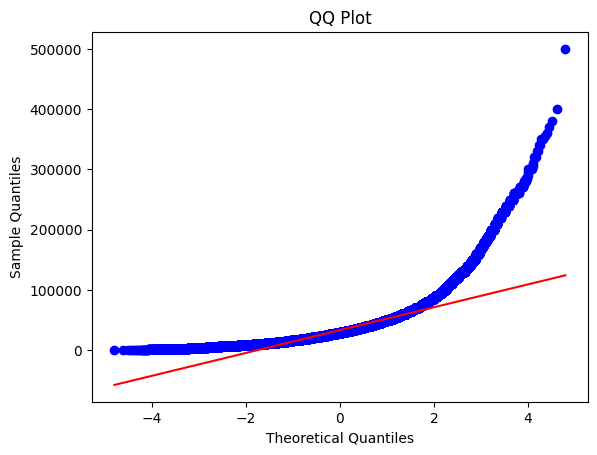

In [ ]:
# 표준 정규 분포로부터 랜덤 샘플 생성
data = pd.read_csv("/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv")

# 열의 데이터를 가져옵니다.
sample_data = data['JS_Price']

# QQ 플롯 그리기
stats.probplot(sample_data, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

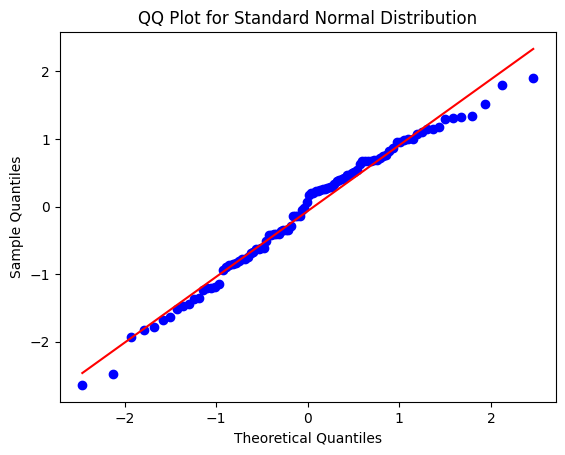

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 평균이 0이고 표준 편차가 1인 표준 정규 분포로부터 샘플 데이터 생성
data = np.random.normal(0, 1, 100)

# QQ 플롯 그리기
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot for Standard Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


# 로버스트 통계 방법 코드

In [ ]:
import pandas as pd
from scipy import stats

## IQR을 사용
- 데이터의 분포가 정규분포에 가까울 때
- 대부분의 이상치가 상위 이상치인 경우 또는 하위 이상치인 경우
- 일반적인 통계적 분석에서 표준적인 방법으로 사용할 때

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

# 선택한 열의 데이터를 가져옵니다.
sample_data = data['JS_Price']

# 중앙값과 IQR 계산
median = sample_data.median()
iqr = stats.iqr(sample_data)

# 이상치 경계값 설정 (예: 1.5배 IQR)
outlier_upper_bound = median + 1.5 * iqr
outlier_lower_bound = median - 1.5 * iqr

# 이상치 식별
outliers = sample_data[(sample_data > outlier_upper_bound) | (sample_data < outlier_lower_bound)]

# 이상치 출력
print("이상치:")
print(outliers)

# 이상치 개수 확인
outlier_count = len(outliers)

# 이상치 개수 출력
print("이상치 개수:", outlier_count)

이상치:
791       65000
792       73000
793       80000
794       90000
795       88000
          ...  
836078    73000
836079    74000
836080    76000
836081    72500
836082    78000
Name: JS_Price, Length: 66611, dtype: int64
이상치 개수: 66611


## MAD
- 데이터의 분포가 정규분포를 따르지 않을 때
- 이상치가 극단적으로 크거나 데이터셋이 작을 때

In [ ]:
import numpy as np
import pandas as pd

def detect_outliers(df, column, threshold=3.5):
    # 중앙값, 중앙값 절대 편차 계산
    median = np.median(df[column])
    mad = np.median(np.abs(df[column] - median))

    # 아웃라이어 탐지
    outlier_threshold = threshold * mad
    outliers = df[column][(df[column] < median - outlier_threshold) | (df[column] > median + outlier_threshold)]

    return outliers

def count_outliers_robust(df, column, threshold=1.5):

    """
    로버스트 통계를 사용하여 아웃라이어의 수를 계산합니다.

    Args:
        df: 데이터프레임
        column: 아웃라이어를 탐지할 열의 이름
        threshold: 아웃라이어의 기준값 (기본값: 1.5)

    Returns:
        아웃라이어의 수
    """

    # 아웃라이어 탐지
    outliers = detect_outliers(df, column, threshold)

    # 아웃라이어의 수 계산
    outlier_count = len(outliers)

    return outlier_count

data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

# 아웃라이어 탐지
outliers = detect_outliers(data, 'JS_Price')

# 아웃라이어의 수 계산
outlier_count = count_outliers_robust(data, 'JS_Price')

print(outlier_count)

233891


## IQR
- 4.3% 제거

In [54]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df,column, threshold=1.5):
  '''
  IQR을 사용하여 아웃라이어를 탐지

  Args:
      df : 데이터프레임
      column : 아웃라이어의 탐지할 열의 이름
      threshold : 아웃라이어의 기준값 (기본값 : 1.5)

  Returns:
      아웃라이어를 포함하는 Series 객체
  '''

  # 1사분위수, 3사분위수, IQR 계산
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1

  # 아웃라이어 탐지
  outlier_threshold = threshold * IQR
  outliers = df[column][(df[column] < Q1 - outlier_threshold) | (df[column] > Q3 + outlier_threshold)]

  return outliers

def count_outliers_iqr(df, column, threshold=1.5):

    """
    IQR을 사용하여 아웃라이어의 수를 계산합니다.

    Args:
        df: 데이터프레임
        column: 아웃라이어를 탐지할 열의 이름
        threshold: 아웃라이어의 기준값 (기본값: 1.5)

    Returns:
        아웃라이어의 수
    """

    # 아웃라이어 탐지
    outliers = detect_outliers_iqr(df, column, threshold)

    # 아웃라이어의 수 계산
    outlier_count = len(outliers)

    return outlier_count

# 예제
data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

outlier_count = count_outliers_iqr(data, "JS_Price")

print(outlier_count)

36062


### 다른 이름으로 CSV파일 저장

In [51]:
# 아웃라이어를 제거한 데이터프레임 생성
df_without_outliers = data.copy()
df_without_outliers.drop(outliers.index, inplace=True)

# 아웃라이어를 제거한 데이터프레임을 다른 이름으로 저장
data = pd.read_csv('/content/drive/MyDrive/semi_project/전처리된_전체_데이터.csv')

KeyError: ignored